## ***Environmental preparation***

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## ***Dataset preparation***

In [2]:
# Importing a dataset and creating a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
df_init = data.copy()

In [3]:
# Display List of columns
list(df_init.dtypes.index)

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [4]:
df = df_init[
    [
        'Make',
        'Model',
        'Year',
        'Engine HP',
        'Engine Cylinders',
        'Transmission Type',
        'Vehicle Size',
        'highway MPG',
        'city mpg',
        'MSRP'
    ]
]

In [5]:
# Converting string columns to lowercase and replacing spaces with underscores
df.columns = df.columns.str.replace(' ', '_').str.lower()
string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [6]:
# Checking for missing values
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_size          0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
# Filling missing values with 0
df = df.fillna(0)

In [8]:
# Checking after filling them with 0
display(df.isnull().sum())

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_size         0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [9]:
# Calculating the mean price
average_price = df['msrp'].mean()

# Creating a binary 'above_average' column based on a condition
df['above_average'] = (df['msrp'] > average_price).astype(int)
del df['msrp']

In [10]:
# Splitting the data into train, validation, and test sets
# Importing library
from sklearn.model_selection import train_test_split

In [11]:
# Splitting the DataFrame 'df' into three subsets: training, validation, and testing.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Displaying the sizes of different data sets
n = len(df)
n_full_train = len(df_full_train)
n_train = len(df_train)
n_val = len(df_val)
n_test = len(df_test)

print(f"n_dataset = \t\t{n}")
# print(f"n_full_train = \t\t{n_full_train}")
print(f"n_train = \t\t{n_train}\t{(n_train / n) * 100:.2f}%")
print(f"n_val = \t\t{n_val}\t{(n_val / n) * 100:.2f}%")
print(f"n_test = \t\t{n_test}\t{(n_test / n) * 100:.2f}%")
print(f"check of sum:\n(train + val + test) = \t{n_train + n_val + n_test}")

n_dataset = 		11914
n_train = 		7148	60.00%
n_val = 		2383	20.00%
n_test = 		2383	20.00%
check of sum:
(train + val + test) = 	11914


In [12]:
# Reset the indexes for df_train, df_val, and df_test
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
# Creating target variables for the training, validation, and test datasets.
# These variables represent the 'above_average' column values from their respective datasets.
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [14]:
# Removing the 'above_average' column from the training, validation, and test datasets.
# This column is being dropped as it is the target variable for binary classification.
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

## ***Question 1***

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_size       11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   above_average      11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [16]:
# Create a list of column names containing numerical data types (int64 and float64)
# from the DataFrame.
num = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
print(num)
# Creating a list of column names ('cat') where the data type is 'object'

cat = list(df_train.select_dtypes(include=['object']).columns)
# cat = list(df_train.dtypes[df_train.dtypes == 'object'].index)
print(cat)

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
['make', 'model', 'transmission_type', 'vehicle_size']


In [17]:
# Import the roc_auc_score function from the scikit-learn metrics module
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [18]:
 # Calculate the ROC AUC score for the each numerical column
for c in num:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print(f'{c:>16s}, {auc:.3f}')

            year, 0.688
       engine_hp, 0.917
engine_cylinders, 0.766
     highway_mpg, 0.633
        city_mpg, 0.673


In [19]:
# Define the selected numerical columns
selected_columns = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

max_auc = -1
best_variable = None

# Calculate the ROC AUC score for selected numerical column
for c in selected_columns:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print(f'{c:>16s}, {auc:.3f}')

    if auc > max_auc:
        max_auc = auc
        best_variable = c

       engine_hp, 0.917
engine_cylinders, 0.766
     highway_mpg, 0.633
        city_mpg, 0.673


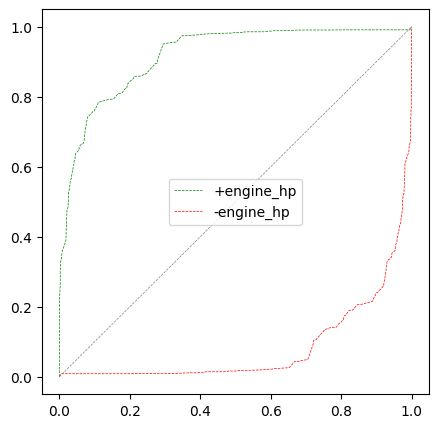

In [20]:
# This code creates a figure for plotting and then generates two Receiver Operating Characteristic (ROC) curves
# for the 'engine_hp' feature and its negation in the training data.

plt.figure(figsize=(5, 5), dpi=100)

# Calculate the ROC curve for the 'engine_hp' feature in the training data
fpr, tpr, _ = roc_curve(y_train, df_train.engine_hp)
plt.plot(fpr, tpr, label='+engine_hp',  color="green", linestyle="dashed", linewidth=0.5)

# Calculate the ROC curve for the negation of 'engine_hp' feature in the training data
fpr, tpr, _ = roc_curve(y_train, -df_train.engine_hp)
plt.plot(fpr, tpr, label='-engine_hp',  color="red", linestyle="dashed", linewidth=0.5)

# Plot the diagonal line representing random chance (no predictive power)
plt.plot([0, 1], [0, 1], color="grey", linestyle="dashed", linewidth=0.5)

plt.legend()
plt.show()

In [21]:
print(f"\nAnswer to question 1:")
print(f'The variable with the highest AUC is: {best_variable}, AUC: {max_auc:.3f}')


Answer to question 1:
The variable with the highest AUC is: engine_hp, AUC: 0.917


## ***Question 2***

In [22]:
# One-hot encoding categorical variables and training a logistic regression model
# Importing libraries
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [23]:
# Converting data sets into dictionaries
train_dict = df_train[num + cat].to_dict(orient="records")
val_dict = df_val[num + cat].to_dict(orient="records")

# One-hot encoding of categorical variables
dv = DictVectorizer(sparse=False)

# Preparing feature matrices
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

# Initializing and training the logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# Making predictions on the validation dataset
y_pred = model.predict_proba(X_val)[:, 1]

# Calculating the ROC AUC score
auc = roc_auc_score(y_val, y_pred)

In [24]:
print(f"\nAnswer to question 2:")
print(f"AUC of this model on the validation dataset is: {auc:.3f}")


Answer to question 2:
AUC of this model on the validation dataset is: 0.974


## ***Question 3***

In [25]:
# Define a function to calculate_precision_recall_curve
def calculate_precision_recall_curve(y_pred, y_val):
    # Generate a range of threshold values from 0 to 1 with 101 evenly spaced points
    thresholds = np.linspace(0, 1, 101)
    scores = []

    # Iterate over each threshold value
    for t in thresholds:
        # Calculate True Positives (tp), False Positives (fp), True Negatives (tn), and False Negatives (fn)
        positive_predictions = y_pred >= t
        negative_predictions = y_pred < t

        positive_actual = y_val == 1
        negative_actual = y_val == 0

        tp = (positive_predictions & positive_actual).sum()
        tn = (negative_predictions & negative_actual).sum()

        fp = (positive_predictions & negative_actual).sum()
        fn = (negative_predictions & positive_actual).sum()

        # Calculate precision (p) and recall (r)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        # Store the computed scores in a tuple
        score = (t, tp, fp, tn, fn, recall, precision)
        scores.append(score)

    # Create a DataFrame from the computed scores
    columns = ['t', 'tp', 'fp', 'tn', 'fn', 'r', 'p']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores

# Usage of the function:
df_scores = calculate_precision_recall_curve(y_pred, y_val)
df_scores[::10]


,t,tp,fp,tn,fn,r,p
0,0.0,654,1729,0,0,1.000000,0.274444
10,0.1,642,377,1352,12,0.981651,0.630029
20,0.2,618,235,1494,36,0.944954,0.724502
30,0.3,606,154,1575,48,0.926606,0.797368
40,0.4,592,116,1613,62,0.905199,0.836158
50,0.5,556,77,1652,98,0.850153,0.878357
60,0.6,523,60,1669,131,0.799694,0.897084
70,0.7,478,27,1702,176,0.730887,0.946535
80,0.8,422,10,1719,232,0.645260,0.976852
90,0.9,343,3,1726,311,0.524465,0.991329


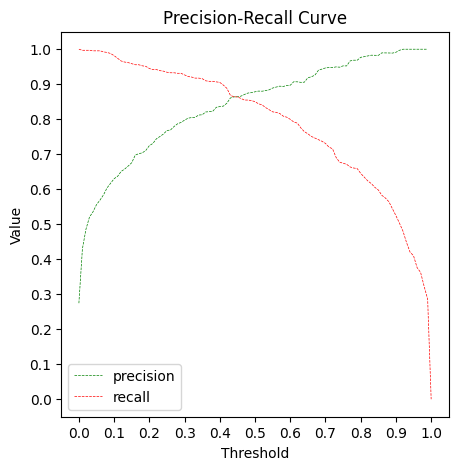

In [27]:
 # Create a figure and axes for the precision-recall curve
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.plot(df_scores["t"], df_scores["p"], label="precision", color="green", linestyle="dashed", linewidth=0.5)
plt.plot(df_scores["t"], df_scores["r"], label="recall", color="red", linestyle="dashed", linewidth=0.5)
plt.xlabel("Threshold")
plt.ylabel("Value")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [28]:
# Searching for points where the curves intersect (where precision and sensitivity are identical)
intersection_points = df_scores[df_scores['p'] - df_scores['r'] == 0.0]
threshold_values = ', '.join(map(str, intersection_points['t'].tolist()))

print(intersection_points[['t', 'p', 'r']])

       t         p         r
44  0.44  0.863914  0.863914
45  0.45  0.863914  0.863914


In [29]:
print(f"\nAnswer to question 3:")
print(f"Precision and recall curves intersect at threshold: {threshold_values}")


Answer to question 3:
Precision and recall curves intersect at threshold: 0.44, 0.45


## ***Question 4***

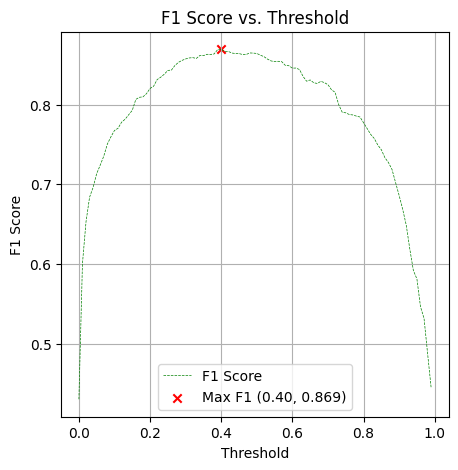

In [30]:
def calculate_and_plot_f1_score(y_pred, y_val):
    df_scores = calculate_precision_recall_curve(y_pred, y_val)

    # Calculate F1 scores from precision and recall
    df_scores['f1'] = 2 * (df_scores['p'] * df_scores['r']) / (df_scores['p'] + df_scores['r'])

    max_f1_score = df_scores['f1'].max()
    best_threshold_idx = df_scores['f1'].idxmax()
    best_threshold = df_scores.at[best_threshold_idx, 't']

    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(df_scores['t'], df_scores['f1'], label='F1 Score', color='green', linestyle='dashed', linewidth=0.5)
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Threshold')
    plt.grid(True)
    plt.legend()

    plt.scatter(best_threshold, max_f1_score, color='red', marker='x', label=f'Max F1 ({best_threshold:.2f}, {max_f1_score:.3f})')

    plt.legend()
    plt.show()

    return best_threshold, max_f1_score

# Usage of the function to calculate and plot F1 Score vs. Threshold
best_threshold, max_f1_score = calculate_and_plot_f1_score(y_pred, y_val)

In [31]:
print(f"\nAnswer to question 4:")
print(f"The maximal F1 score is {max_f1_score:.6f} at threshold {best_threshold:.2f}")


Answer to question 4:
The maximal F1 score is 0.869310 at threshold 0.40


## ***Question 5***

In [32]:
# Import the KFold class from scikit-learn
from sklearn.model_selection import KFold

In [33]:
# Training function that prepares and trains a logistic regression model:
def train(df_train, y_train, C=1.0):
    dicts = df_train[cat + num].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    # Initialize a logistic regression model with specified hyperparameters
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    # Return the trained DictVectorizer and the logistic regression model
    return dv, model

# Prediction function that uses a trained model to make predictions:
def predict(df, dv, model):
    dicts = df[cat + num].to_dict(orient='records')
    X = dv.transform(dicts)

    # Make probability predictions for the positive class (class 1)
    y_pred = model.predict_proba(X)[:, 1]

    # Return the probability predictions
    return y_pred

In [34]:
# Generate predictions on the validation dataset using the trained model:
y_pred = predict(df_val, dv, model)

In [35]:
# Initialize an empty list to store the AUC scores for each fold
scores = []

# Create a 5-fold cross-validation iterator with shuffling and a random seed for reproducibility
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Iterate over the 5 folds of the training data
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    # Extract the target variables (above_average) for training and validation sets
    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    # Train a logistic regression model with specified parameters (C=1.0)
    # using the train function which prepares the data and fits the model
    dv, model = train(df_train, y_train, C=1.0)

    # Use the trained model to make predictions on the validation set
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

# Calculate the mean and standard deviation of the AUC scores across all folds
mean_scores = np.mean(scores)
std_deviation = np.std(scores)

print(f'Mean AUC scores:{mean_scores:.3f} +- {std_deviation:.3f}')

Mean AUC scores:0.978 +- 0.001


In [36]:
print(f"\nAnswer to question 5:")
print(f'The standard deviation of the AUC results in each fold is: {std_deviation:.3f}')


Answer to question 5:
The standard deviation of the AUC results in each fold is: 0.001


## ***Question 6***

In [37]:
# Imports the tqdm library and specifically the tqdm class from the "tqdm.auto" module.
from tqdm.auto import tqdm

In [38]:
# Define a function calel 'train'
def train(df, y, C = 1):
    # Convert the selected DataFrame columns to a list of dictionaries
    dicts = df[cat + num].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)

    # Create a Logistic Regression model with specified parameters
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    # Return the trained DictVectorizer and the trained Logistic Regression model
    return dv, model

In [39]:
# This code defines a function cross_validate_C that performs cross-validation
# for different values of the regularization parameter C using logistic regression.
# It computes the ROC AUC scores for each C value and returns the results as a list of tuples containing C,
# mean score, and standard deviation. The function is then used to evaluate and print the performance of different C values on the dataset.

def cross_validate_C(df_full_train, C_values):
    results = []

    # Iterate over different values of C
    for C in tqdm(C_values):
        scores = []
        n_splits = 5  # Number of splits for cross-validation

        # Create KFold cross-validator with shuffling
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

        # Perform cross-validation
        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train.above_average.values
            y_val = df_val.above_average.values

            # Train a model with the specified C value
            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)

            # Calculate ROC AUC score and append to the scores list
            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)

        # Calculate the mean score and standard deviation
        mean_score = np.round(np.mean(scores), 3)
        std_deviation = np.round(np.std(scores), 8)

        # Store results as a tuple (C, mean_score, std_deviation)
        results.append((C, mean_score, std_deviation))

    return results

# Usage of the function:
C_values = [0.01, 0.1, 0.5, 10]
results = cross_validate_C(df_full_train, C_values)

for C, mean_score, std_deviation in results:
    print(f"C={C}, Mean Score: {mean_score}, STD: {std_deviation}")

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01, Mean Score: 0.947, STD: 0.00214518
C=0.1, Mean Score: 0.969, STD: 0.00160081
C=0.5, Mean Score: 0.977, STD: 0.00230198
C=10, Mean Score: 0.98, STD: 0.00213328


In [40]:
best_result = max(results, key=lambda x: x[1])

print(f"\nAnswer to question 6:")
print(f"The best average result is led by C={best_result[0]}, Mean Score: {best_result[1]}, STD: {best_result[2]}")


Answer to question 6:
The best average result is led by C=10, Mean Score: 0.98, STD: 0.00213328
